# O Trabalho devera ser realizado de forma individual e ser enviado via e-mail até 23:59 do dia 26/06/2023
email para enviar o trabalho: arthur.siqueira@ceub.edu.br

In [40]:
# nome: Leão Pereira  
# RA: 22200115

# Projeto: Análise e Previsão do Preço de Notebooks
***

# Parte 1: Importação e Limpeza dos Dados
***

#### 1. Importação das bibliotecas necessárias
- Importe todas as bibliotecas relevantes para o projeto, como `pandas`, `numpy`, `matplotlib`, `sklearn` e outras que forem pertinentes.
***

In [41]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

from keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.model_selection import KFold
from keras.regularizers import l2
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model

#### 2. Carregamento dos dados
- Os dados a serem analisados serão obtidos a partir da base de dados `preco_notebooks.csv`, que contém informações diversas sobre notebooks, bem como o respectivo preço.
***

In [42]:
df = pd.read_csv('notebooks.csv')

# Parte 2: Análise Exploratória de Dados (EDA)
***

#### 3. Análise descritiva
- Realize uma análise descritiva inicial dos dados, gerando estatísticas resumidas (média, mediana, moda, etc.), valores núlos...
***

In [43]:
df.head()

,marca,ano,qtd_nucleos,qtd_threads,ram,gpu_dedicada,ram_gpu,entradas_usb,duracao_bateria,resolucao_tela,tipo_tela,tela_touch,armazenamento_hdd,armazenamento_ssd,segmento,valor
0,apple,2020.0,6,8.0,8,não,0,2.0,461.0,4K,AMOLED,não,0,250.0,NaN,18993
1,asus,2010.0,6,10.0,8,não,0,2.0,523.0,FULLHD,AMOLED,não,500,NaN,NaN,17637
2,huawei,NaN,6,12.0,16,não,0,2.0,546.0,4K,AMOLED,não,0,NaN,NaN,26000
3,apple,2015.0,10,17.0,8,não,0,3.0,571.0,FULLHD,AMOLED,não,0,250.0,NaN,20513
4,apple,NaN,10,11.0,16,não,0,2.0,477.0,QUADHD,OLED,não,0,500.0,NaN,23387


In [44]:
df.describe()

,ano,qtd_nucleos,qtd_threads,ram,ram_gpu,entradas_usb,duracao_bateria,armazenamento_hdd,armazenamento_ssd,valor
count,68034.000000,90000.000000,75925.000000,90000.000000,90000.000000,81455.000000,83906.000000,90000.000000,81415.000000,90000.000000
mean,2016.500397,7.320222,10.973645,13.738644,1.210311,2.613860,346.450182,333.086111,608.373764,15241.639978
std,4.019971,2.931961,5.066873,10.562201,2.330705,0.884701,191.563514,575.373998,643.676331,6091.971693
min,2010.000000,2.000000,2.000000,2.000000,0.000000,1.000000,30.000000,0.000000,0.000000,2667.000000
25%,2013.000000,4.000000,7.000000,8.000000,0.000000,2.000000,150.000000,0.000000,250.000000,9777.000000
50%,2017.000000,8.000000,10.000000,12.000000,0.000000,3.000000,420.000000,0.000000,250.000000,16031.000000
75%,2020.000000,10.000000,14.000000,16.000000,0.000000,3.000000,522.000000,500.000000,1000.000000,20152.000000
max,2023.000000,12.000000,24.000000,64.000000,12.000000,4.000000,600.000000,2000.000000,2000.000000,28503.000000


In [45]:
df.describe(include = 'O')

,marca,gpu_dedicada,resolucao_tela,tipo_tela,tela_touch,segmento
count,89372,90000,90000,90000,90000,89990
unique,11,2,4,5,2,8
top,xiaomi,não,FULLHD,OLED,não,premium
freq,8284,68292,37465,27208,82465,34399


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   marca              89372 non-null  object 
 1   ano                68034 non-null  float64
 2   qtd_nucleos        90000 non-null  int64  
 3   qtd_threads        75925 non-null  float64
 4   ram                90000 non-null  int64  
 5   gpu_dedicada       90000 non-null  object 
 6   ram_gpu            90000 non-null  int64  
 7   entradas_usb       81455 non-null  float64
 8   duracao_bateria    83906 non-null  float64
 9   resolucao_tela     90000 non-null  object 
 10  tipo_tela          90000 non-null  object 
 11  tela_touch         90000 non-null  object 
 12  armazenamento_hdd  90000 non-null  int64  
 13  armazenamento_ssd  81415 non-null  float64
 14  segmento           89990 non-null  object 
 15  valor              90000 non-null  int64  
dtypes: float64(5), int64(5

#### 4. Análise dos atributos dos notebooks
- Quais marcas tendem a ser mais caras?
***

In [47]:
preco = df.groupby('marca')['valor'].mean().round(3)
preco = preco.apply(lambda x: f'R$ {x:.2f}')

In [48]:
preco_caro = preco.sort_values(ascending=False)

In [49]:
preco_caro

marca
positivo     R$ 6077.82
huawei      R$ 20551.56
xiaomi      R$ 20530.46
apple       R$ 20520.45
razer       R$ 19592.92
asus        R$ 13959.57
lenovo      R$ 13571.65
samsung     R$ 13551.02
dell        R$ 13512.59
acer        R$ 13498.40
hp          R$ 12372.00
Name: valor, dtype: object

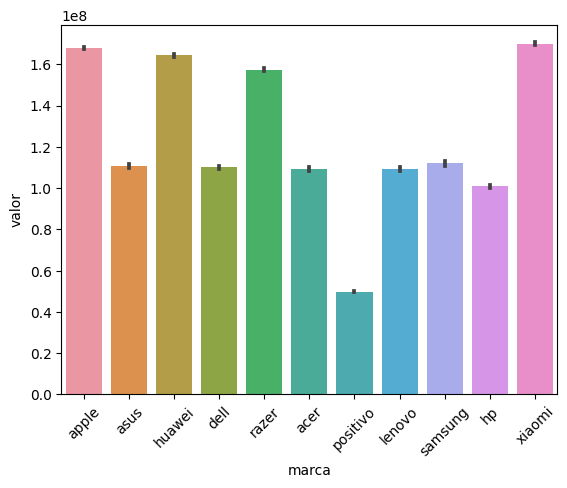

In [50]:
sns.barplot(x='marca', y='valor', data=df, estimator=sum)
plt.xticks(rotation=45)
plt.show()

# Parte 3: Pré-processamento de Dados
***

#### 5. Tratamento de dados núlos
- Verifique a presença de valores nulos nos dados e trate-os de maneira adequada.
***

In [51]:
df.isna().sum() *100 / len(df)

marca                 0.697778
ano                  24.406667
qtd_nucleos           0.000000
qtd_threads          15.638889
ram                   0.000000
gpu_dedicada          0.000000
ram_gpu               0.000000
entradas_usb          9.494444
duracao_bateria       6.771111
resolucao_tela        0.000000
tipo_tela             0.000000
tela_touch            0.000000
armazenamento_hdd     0.000000
armazenamento_ssd     9.538889
segmento              0.011111
valor                 0.000000
dtype: float64

In [52]:
df['marca'].unique()

array(['apple', 'asus', 'huawei', 'dell', 'razer', 'acer', 'positivo',
       'lenovo', 'samsung', 'hp', 'xiaomi', nan], dtype=object)

In [53]:
df = df.dropna(subset=['marca', 'segmento'])

In [54]:
df.isna().sum()

marca                    0
ano                  21819
qtd_nucleos              0
qtd_threads          13966
ram                      0
gpu_dedicada             0
ram_gpu                  0
entradas_usb          8480
duracao_bateria       6050
resolucao_tela           0
tipo_tela                0
tela_touch               0
armazenamento_hdd        0
armazenamento_ssd     8509
segmento                 0
valor                    0
dtype: int64

In [55]:
df['ano'].describe()

count    67543.000000
mean      2016.502021
std          4.020217
min       2010.000000
25%       2013.000000
50%       2017.000000
75%       2020.000000
max       2023.000000
Name: ano, dtype: float64

In [ ]:
df['duracao_bateria'].describe()

In [56]:
df.loc[df['ano'].isna(),'ano'] = '2016'
df.loc[df['duracao_bateria'].isna(),'duracao_bateria'] = '346.000000'

In [58]:
# Substituir NaN por valores interpolados na coluna 'valor'
# a escolha pelo metodo spline se deve a variação de dados, já que a linear (padrão) não é a melhor para capturar variação de dados
df['qtd_threads'].interpolate(method='spline', order=2, inplace=True)



C:\Users\Leão Neto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\interpolate\_fitpack2.py:298: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


In [ ]:
df['armazenamento_ssd'].interpolate(method='spline', order=2, inplace=True)

In [59]:
df['entradas_usb'].fillna(df['entradas_usb'].mean(), inplace=True)

In [60]:
df.isna().sum()

marca                0
ano                  0
qtd_nucleos          0
qtd_threads          0
ram                  0
gpu_dedicada         0
ram_gpu              0
entradas_usb         0
duracao_bateria      0
resolucao_tela       0
tipo_tela            0
tela_touch           0
armazenamento_hdd    0
armazenamento_ssd    0
segmento             0
valor                0
dtype: int64

#### 6. Manipulação de variáveis categóricas
- Trate as variáveis categóricas presentes no dataset (colunas do tipo object), como a `marca` e `segmento`. Utilize a função `.loc` do pandas ou o `LabelEncoder` do sklearn.
***

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89362 entries, 10 to 89999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   marca              89362 non-null  object 
 1   ano                89362 non-null  object 
 2   qtd_nucleos        89362 non-null  int64  
 3   qtd_threads        89362 non-null  float64
 4   ram                89362 non-null  int64  
 5   gpu_dedicada       89362 non-null  object 
 6   ram_gpu            89362 non-null  int64  
 7   entradas_usb       89362 non-null  float64
 8   duracao_bateria    89362 non-null  object 
 9   resolucao_tela     89362 non-null  object 
 10  tipo_tela          89362 non-null  object 
 11  tela_touch         89362 non-null  object 
 12  armazenamento_hdd  89362 non-null  int64  
 13  armazenamento_ssd  89362 non-null  float64
 14  segmento           89362 non-null  object 
 15  valor              89362 non-null  int64  
dtypes: float64(3), int64(5), o

In [66]:
df.describe(include = 'O')

,marca,ano,gpu_dedicada,duracao_bateria,resolucao_tela,tipo_tela,tela_touch,segmento
count,89362,89362,89362,89362,89362,89362,89362,89362
unique,11,15,2,572,4,5,2,8
top,xiaomi,2016,não,346.000000,FULLHD,OLED,não,premium
freq,8284,21819,67796,6050,37209,27036,81877,34169


In [ ]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# Assuming 'X' is your DataFrame with both numeric and categorical variables
# Specify the indices of the numeric and categorical columns
numeric_cols = [0, 1, 2]  # Assuming the first three columns are numeric
categorical_cols = [3]  # Assuming the fourth column is categorical

# Define the transformers for numeric and categorical columns
numeric_transformer = MinMaxScaler()
categorical_transformer = OneHotEncoder()

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply the preprocessing steps to your data
X_preprocessed = preprocessor.fit_transform(X)

# Convert the preprocessed data back to a DataFrame
X_norm = pd.DataFrame(X_preprocessed, columns=numeric_cols + preprocessor.transformers_[1][1].get_feature_names_out(categorical_cols))


In [70]:
categorical_cols = ['marca', 'ano', 'gpu_dedicada','resolucao_tela', 'tipo_tela', 'tela_touch', 'segmento'] 

# Realiza a codificação one-hot das colunas categóricas
df = pd.get_dummies(df, columns=categorical_cols)



In [74]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 89362 entries, 10 to 89999
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   qtd_nucleos                    89362 non-null  int64  
 1   qtd_threads                    89362 non-null  float64
 2   ram                            89362 non-null  int64  
 3   ram_gpu                        89362 non-null  int64  
 4   entradas_usb                   89362 non-null  float64
 5   duracao_bateria                89362 non-null  object 
 6   armazenamento_hdd              89362 non-null  int64  
 7   armazenamento_ssd              89362 non-null  float64
 8   valor                          89362 non-null  int64  
 9   marca_acer                     89362 non-null  bool   
 10  marca_apple                    89362 non-null  bool   
 11  marca_asus                     89362 non-null  bool   
 12  marca_dell                     89362 non-null  boo

#### 7. Separação dos dados
- Separe os dados em atributos (X) e alvo (y), sendo o preço do notebook o alvo.
***

In [71]:
X = df[df.columns[:-1]]
y = df[['valor']]

#### 8. Normalização dos dados
- Normalizar o X utilizando a função `MinMaxScaler` do sklearn.
- Normalizar o y utilizando a função `MinMaxScaler` do sklearn.
***

In [72]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

#### 9. Dividir dados em treinamento, validação e teste
- Divida o conjunto de dados em uma parte para treinamento, outra para teste (15%) e outra para validação (15%).
***

# Parte 4: Modelagem e Avaliação
***

#### 10. Treinamento de um algoritmo (modelo) de machine learning
- Desenvolva e treine uma algoritmo para regressão para parar o treinamento após 25 épocas sem melhorar o loss de validação.
***

#### 11. Avaliação do modelo
- Exiba o loss de validação e treinamento durante o treinamento do modelo
***

#### 12. Avaliação do modelo
- Após o treinamento, avalie o desempenho do seu modelo. Utilize o conjunto de teste para isso e calcule no mínimo 2 métricas de avaliação apropriadas.
***

#### 13. Definição da Clusterização
- Utilize o método do cotovelo para descobrir qual a quantidade ideal de grupos para realizar uma clusterização. (para isto considere todas as colunas do dataframe como sendo parte dos atributos, inclusive o valor. Não esqueça de normalizar antes.)
***

#### 14. Avaliação do modelo
- Treine um algoritmo de clusterização com a quantidade de grupos identificada pelo método do cotovelo.
***

#### 15. Avaliação do clusters
- Exiba 4 gráficos diferentes para exibir e avaliar os grupos de clusters identificados.
***